<a href="https://colab.research.google.com/github/20315022/Aims/blob/master/ObjectsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import numpy as np
import os
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight as cw
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout
from numpy.core.fromnumeric import resize
from matplotlib.image import imread
from skimage.io import imread, imshow
from pathlib import Path

In [ ]:
data_dir ='/content/drive/MyDrive/dataset1'

In [ ]:

labels = ['malade','sain']
img_size = 224
def get_data(data_dir):
  data =[]
  for label in labels:
    path = os.path.join(data_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
      #try:
        #img_arr =cv2.imread(os.path(path, img))[..., :: -1]
        img_arr =cv2.imread(str(path)+'/'+str(img))
        resized_arr =cv2.resize(img_arr,(img_size, img_size))
        data.append([resized_arr, class_num])
      #except  Exception as e:
          #print(e)
  return np.array(data)
  

In [ ]:
train = get_data('../content/drive/MyDrive/datamaize/train')
val = get_data('../content/drive/MyDrive/datamaize/test')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

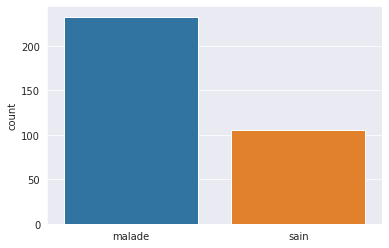

In [ ]:
from numpy.lib.function_base import append
l = []
for i in train:
  if(i[1]== 0 ):
    l.append("malade")
  else:
    l.append("sain")
  sns.set_style('darkgrid')
  sns.countplot(l)

Text(0.5, 1.0, 'malade')

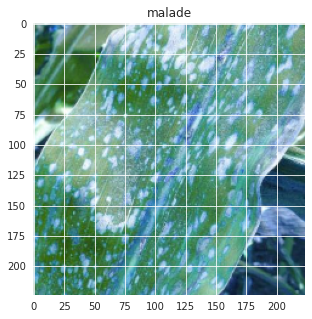

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[209][0])
plt.title(labels[train[0][1]])

In [ ]:
X_train = []
y_train = []
X_val = []
y_val = []

for feature, label in train:
  X_train.append(feature)
  y_train.append(label)

for feature, label in val:
  X_val.append(feature)
  y_val.append(label)

# Normalize the data
X_train = np.array(X_train)/255
X_val = np.array(X_val)/255

X_train.reshape(-1, img_size, img_size,1)
y_train = np.array(y_train)

X_val.reshape(-1, img_size, img_size,1)
y_val = np.array(y_val)

datagen = ImageDataGenerator(featurewise_center=False,#set input mean to 0 over the the tataset
                             samplewise_center= False, # Set each sample mean to 0
                             featurewise_std_normalization = False, # Divide each inputs by its std
                             zca_whitening= False, # apply ZCA whitening
                             rotation_range=30, # randomly rotate images in the range (degrees 0 to 180)
                             zoom_range= 0.2, # randomly zoom image
                             width_shift_range= 0.1, # randomly shift image horizontally(fraction of total width)
                             height_shift_range=0.1, # Randomly image vertically(fraction of total height)
                             horizontal_flip= True, # randomly flip images
                             vertical_flip = False)
datagen.fit(X_train)

In [ ]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]


In [ ]:
model1 = Sequential()

model1.add(Conv2D(64,3,padding="same", activation="relu", input_shape=(224,224,3)))
model1.add(MaxPooling2D())

model1.add(Conv2D(128,3, padding="same", activation="relu"))
model1.add(MaxPooling2D())
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(128, activation="relu"))
model1.add(Dense(2, activation="Softmax"))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 128)       0         
                                                                 
 flatten_1 (Flatten)         (None, 401408)           

In [ ]:
from tensorflow.python import metrics
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data= (X_val, y_val))

Epoch 1/5
8/8 [==============================] - 19s 2s/step - loss: 0.2361 - accuracy: 0.8583 - val_loss: 0.2472 - val_accuracy: 0.9714
Epoch 2/5
8/8 [==============================] - 18s 2s/step - loss: 0.1828 - accuracy: 0.9750 - val_loss: 0.1427 - val_accuracy: 0.9714
Epoch 3/5
8/8 [==============================] - 18s 2s/step - loss: 0.1090 - accuracy: 0.9750 - val_loss: 0.1168 - val_accuracy: 0.9714
Epoch 4/5
8/8 [==============================] - 18s 2s/step - loss: 0.1004 - accuracy: 0.9750 - val_loss: 0.1148 - val_accuracy: 0.9714
Epoch 5/5
8/8 [==============================] - 18s 2s/step - loss: 0.0879 - accuracy: 0.9750 - val_loss: 0.1229 - val_accuracy: 0.9714


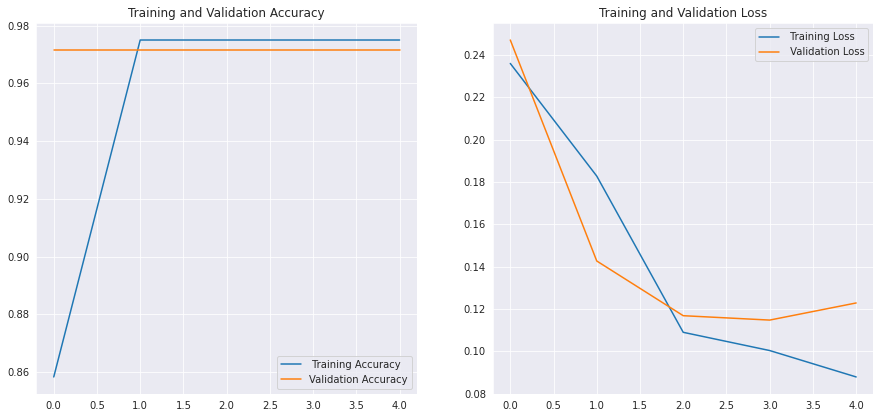

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.plot(epochs_range, acc, label=" Training Accuracy")
plt.plot(epochs_range, val_acc, label ="Validation Accuracy")
plt.legend(loc="lower right")
plt.title('Training and Validation Accuracy')

plt.subplot(2,2,2)
plt.plot(epochs_range, loss, label=" Training Loss ")
plt.plot(epochs_range, val_loss, label=" Validation Loss")
plt.legend(loc ="upper right")
plt.title('Training and Validation Loss')
plt.show()